<a href="https://colab.research.google.com/github/sara-aljuhani/Classification-and-Analyzing-Facial-and-Eye-Features-of-Drugs-Abuser-Using-AI/blob/main/HOG%26SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import os
import numpy as np

def load_dataset(base_path):
    classes = ['Normal', 'Abnormal']
    images = []
    labels = []

    for i, _class in enumerate(classes):
        dir_path = os.path.join(base_path, _class)
        for img_name in os.listdir(dir_path):
            img_path = os.path.join(dir_path, img_name)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (128, 64))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            images.append(img)
            labels.append(i)
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

# Define the base path where the dataset is located
base_path = '/content/drive/MyDrive/eyedataset'

# Load the dataset
images, labels = load_dataset(base_path)


In [ ]:
from skimage.feature import hog


orientations = 9
pixels_per_cell = (8, 8)
cells_per_block = (2, 2)


hog_features = []

# Extract HOG features for each image
for image in images:
    hog_feature = hog(image, orientations=orientations,
                      pixels_per_cell=pixels_per_cell, cells_per_block=cells_per_block)
    hog_features.append(hog_feature)

hog_features = np.array(hog_features)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(hog_features, labels, test_size=0.3, random_state=42)

In [ ]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
from sklearn.metrics import classification_report

# Make predictions on the test set
predictions = svm_classifier.predict(X_test)
# Evaluate the classifier
print("Classification Report:\n")
print(classification_report(y_test, predictions))

Classification Report:

              precision    recall  f1-score   support

           0       0.71      0.81      0.76        37
           1       0.77      0.67      0.72        36

    accuracy                           0.74        73
   macro avg       0.74      0.74      0.74        73
weighted avg       0.74      0.74      0.74        73



Confusion Matrix:
[[30  7]
 [12 24]]


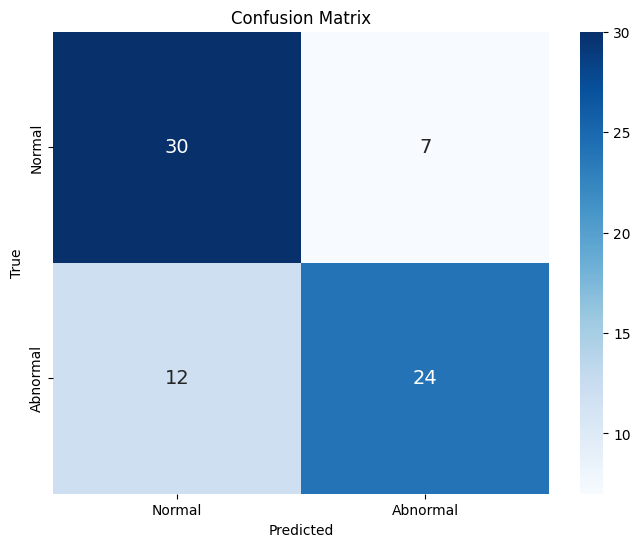

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Print the confusion matrix
cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(cm)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Abnormal'], yticklabels=['Normal', 'Abnormal'],
            annot_kws={"size": 14})  # Adjust size here
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `predictions` and `y_test` are defined and contain your model's predictions and the true labels respectively
report = classification_report(y_test, predictions, target_names=['Normal', 'Abnormal'], output_dict=True)
# Convert the classification report to a DataFrame
report_df = pd.DataFrame(report).transpose()
print(report_df)


              precision    recall  f1-score    support
Normal         0.714286  0.810811  0.759494  37.000000
Abnormal       0.774194  0.666667  0.716418  36.000000
accuracy       0.739726  0.739726  0.739726   0.739726
macro avg      0.744240  0.738739  0.737956  73.000000
weighted avg   0.743829  0.739726  0.738251  73.000000


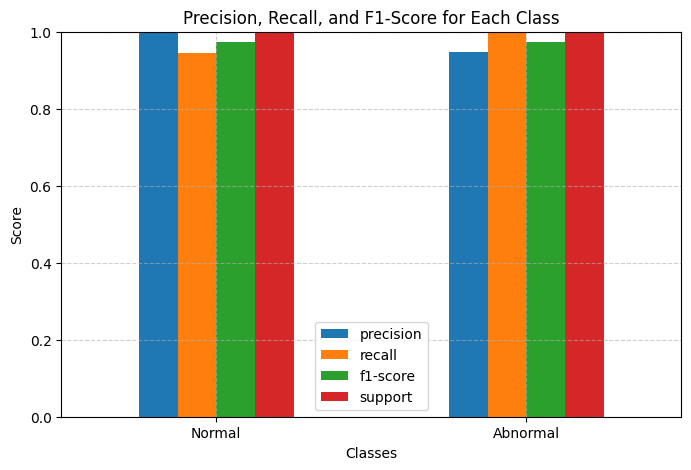

In [ ]:
# Plotting Precision, Recall, and F1-Score
fig, ax = plt.subplots(figsize=(8, 5))
report_df[:-3].plot(kind='bar', ax=ax)  # Skipping the last three rows which are average measures
ax.set_title('Precision, Recall, and F1-Score for Each Class')
ax.set_xlabel('Classes')
ax.set_ylabel('Score')
ax.set_ylim([0, 1])  # Limit y-axis to 1 for readability
plt.xticks(rotation=0)  # Keep the class names horizontal
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
